# Tâche 8: Bandes électriques du cristal Sr2SbAu

## Imports et téléchargement du fichier


In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import *
import numpy as np
import matplotlib.pyplot as plt

# Télécharger le dossier 
with MPRester("m5wyacFUOgt3WAfAgu9M") as m:
    band_structure = m.get_bandstructure_by_material_id("mp-867168")

## Graphe des bandes


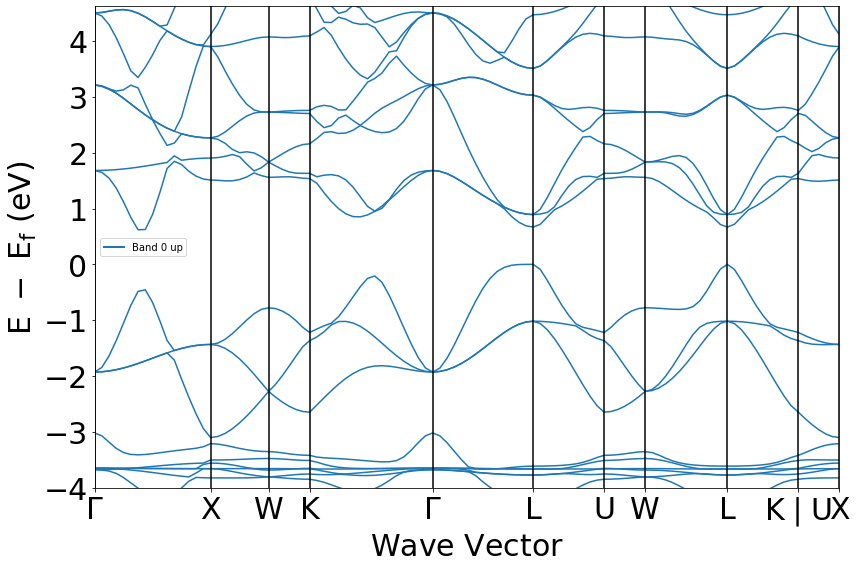

In [2]:
bsplotter = BSPlotter(band_structure)
bsplotter.show()

## 1. La bande interdite

Energie : 0.6199999999999997 ev 
Bande directe : non 
Transition : Γ-X
La bande interdite se trouve entre 0.0 et 0.6199999999999997


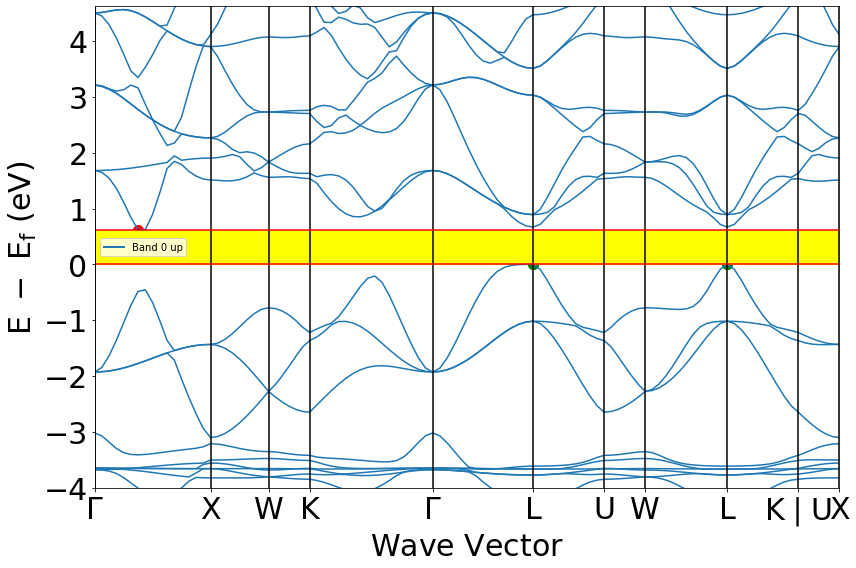

In [3]:
band_gap = band_structure.get_band_gap()
energy = band_gap['energy']
direct = band_gap['direct']
transition = band_gap['transition']


#marque la position de la bande de valence maximale (VBM) et de la bande de conduction minimale (CBM) sur le diagramme
bsplotter.get_plot(vbm_cbm_marker=True)

# Obtenir les données pour le tracé de la bande
data = bsplotter.bs_plot_data()

# Extraire les distances et créer une grille d'abscisses
distances = bsplotter.get_ticks()["distance"]
x = np.linspace(0, distances[-1], 100)

#minimale
ymin = data['vbm'][0][1]
y1 = np.ones(100)*ymin

#maximale
ymax = data['cbm'][0][1]
y2 = np.ones(100)*ymax

plt.plot(x, y1,"-r")
plt.plot(x, y2,"-r")
plt.fill_between(np.linspace(0, bsplotter.bs_plot_data().get("ticks").get("distance")[-1], 500), 0, band_gap.get('energy'), color ='yellow')


print("Energie : {} ev \nBande directe : {} \nTransition : \u0393-X".format(energy, 'oui' if direct else 'non'))
print("La bande interdite se trouve entre "+ str(ymin) + " et " + str(ymax))

On peut observer sur ce graph que la bande interdite se trouve entre 0 et 1 eV. 


En effet le point rouge qui indique le point minimum de la bande de conduction se trouve sous 1 eV. Et les 2 points verts qui indiquent le maximum de la bande de valence. Entre les deux se trouve donc bien une bande interdite. 

Cette bande est indirecte, ce qui signifie qu'un électron ne peut pas passer de la bande de valence a la bande  de conduction.
En conclusion, on peut dire que le cristal a un comportement semi-conducteur.

## 2. Les dispersions

Pour calculer la dispersion de la dernière bande de valence et de la première bande de conduction, il faut déterminer les pentes maximales et minimales de chaque branche de ces bandes. Une dispertion maximale correspond à une pente maximale. De manière équivalente, une dispertion minimale correspond à une pente minimale.

In [4]:
#La première bande de conduction
cbm = band_structure.get_cbm()

#on cherche le point rouge = le minimum de la bande de conduction
Emin = cbm['energy']
print("L'énergie du minimum de la bande de conduction vaut Emin = " + str(Emin) + "eV") 
print("Bandes contenant le min de la bande de conduction :" ,cbm['band_index'])
print("----------")


#La dernière bande de valence
vbm = band_structure.get_vbm()

#on cherche le point vert = le maximum de la bande de valence 
Emax = vbm['energy']
print("L'énergie du maximum de la bande de valence vaut Emax = " + str(Emax) + "eV")
print("Bandes contenant le max de la bande de valence :" , vbm['band_index'])

L'énergie du minimum de la bande de conduction vaut Emin = 4.4388eV
Bandes contenant le min de la bande de conduction : defaultdict(<class 'list'>, {<Spin.up: 1>: [18]})
----------
L'énergie du maximum de la bande de valence vaut Emax = 3.8188eV
Bandes contenant le max de la bande de valence : defaultdict(<class 'list'>, {<Spin.up: 1>: [17]})


La bande contenant le minimum de la bande de conduction est la bande [18].
La bande contenant le maximum de la bande de valence est la bande [17].

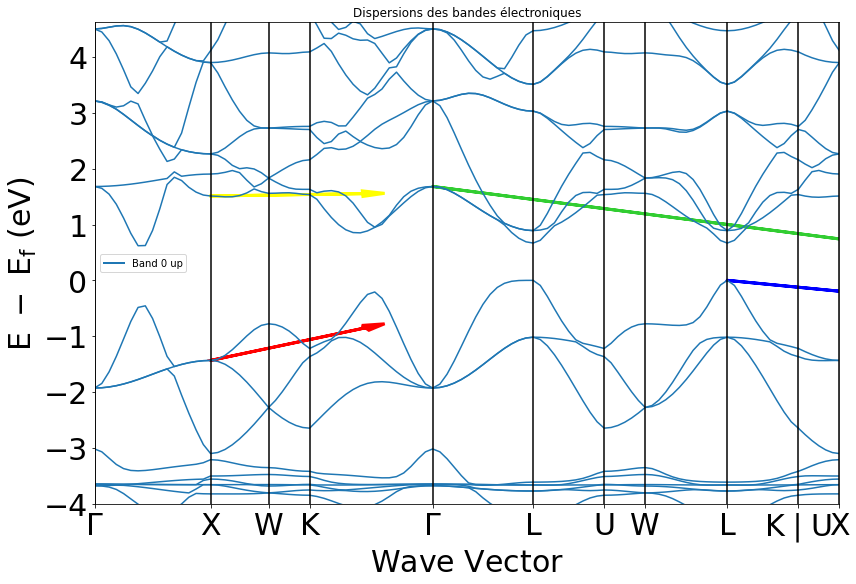

In [5]:
#analyse des dispersions

data = bsplotter.bs_plot_data()
e = data.get('energy')
dist = data.get('ticks').get('distance')

# Array ne contennant pas de distance redondante
d = np.array([dist[0], dist[1], dist[3], dist[5], dist[7], dist[9], dist[11], dist[13], dist[15], dist[17], dist[18]])

distance = d[1:]- d[0]


bsplotter.get_plot()
plt.title("Dispersions des bandes électroniques")

# Création de la flèche rouge: maximum de la dernière bande de valence
plt.arrow(d[1], (e.get('1')[1][17][0]), distance[1],(e.get('1')[1][17][-1])-(e.get('1')[1][17][0]), color='red', head_width = 0.1, linewidth=3, length_includes_head=True)

# Création de la flèche bleue: minimum de la dernière bande de valence
plt.arrow(d[8], (e.get('1')[8][17][0]), distance[8],(e.get('1')[8][17][-1])-(e.get('1')[8][17][0]), color='b', head_width = 0.1, linewidth=3, length_includes_head=True)

# Création de la flèche jaune: maximum de la première bande de conduction
plt.arrow(d[1], (e.get('1')[1][18][0]), distance[1],(e.get('1')[1][18][-1])-(e.get('1')[1][18][0]), color='yellow', head_width = 0.1, linewidth=3, length_includes_head=True)

# Création de la flèche verte: maximum de la première bande de conduction
plt.arrow(d[4], (e.get('1')[4][18][0]), distance[4],(e.get('1')[4][18][-1])-(e.get('1')[4][18][0]), color='limegreen', head_width = 0.1, linewidth=3, length_includes_head=True)

plt.show()

La dernière bande de valence présente donc le moins de dispersion dans la direction X-W (flèche jaune) et le plus de dispersion dans la direction Γ-L (flèche verte). 

A côté de ça, la première bande de conduction présente le plus de dispersion dans la direction X-W (flèche rouge) et le moins de dispersion dans la direction L-K| (flèche bleue).

## 3. Calcul de la masse effective

Nous allons calculer la masse effective au sommet de la dernière bande de valence et à la base de la première bande de conduction en supposant une dispersion parabolique.

Pour calculer celle-ci, nous aurons besoin de la formule suivante: 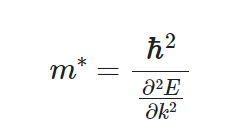 ou $\hbar$ =  est la constante de Planck réduite ($\hbar$ = 6.62607015e-34 J), $E$ est l'énergie de la bande électronique et $k$ est le vecteur d'onde. En supposant une dispersion parabolique: $E = ak^2 + bk +c $, on trouve que le dénominateur est égale a 2a. On arrive finalement a la formule suivante pour la masse effective:

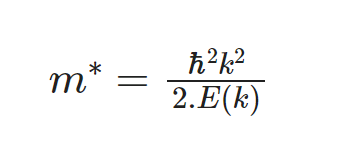

In [20]:
h = 6.62607015e-34 #J
h_bar = h/(2*np.pi)#eV
m_el = 9.11e-31

#Calcul des composantes du vecteur d'onde k 
Kpoint_VBM = vbm.get('kpoint').frac_coords
Kpoint_CBM = cbm.get('kpoint').frac_coords

#Energies des bandes de valence et de conduction - J
energy_VBM = vbm.get('energy')  
energy_CBM = cbm.get('energy')  

#Calcul de la norme
Norme_Kpoint_VBM = np.linalg.norm(Kpoint_VBM)
Norme_Kpoint_CBM = np.linalg.norm(Kpoint_CBM)

#Calcul des masses effectives - kg
MasseE_VBM = ((h_bar**2) * (Norme_Kpoint_VBM **2)/(abs(energy_VBM * 2)))  
MasseE_CBM = ((h_bar**2) * (Norme_Kpoint_CBM **2)/(abs(energy_CBM * 2)))  

print("en supposant une dispersion parabolique, on calcule la norme et par la suite la masse effective")
print(" ")
print("La norme : ")
print("La bande de valence = ", Norme_Kpoint_VBM)
print("La bande de conduction = ", Norme_Kpoint_CBM)
print("  ")
print("La masse effective :")
print("La bande de valence = ", MasseE_VBM, "kg")
print("La bande de conduction = ", MasseE_CBM, "kg")


en supposant une dispersion parabolique, on calcule la norme et par la suite la masse effective
 
La norme : 
La bande de valence =  0.8660254037844386
La bande de conduction =  0.2651650429449553
  
La masse effective :
La bande de valence =  1.092085588313264e-69 kg
La bande de conduction =  8.808243031585168e-71 kg
